### Testing model on image

In [5]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image, ImageDraw, ImageFont


In [3]:
model_dir      = "/kaggle/input/rtdter/pytorch/default/1"  # folder saved by trainer.save_model()
processor = AutoImageProcessor.from_pretrained(model_dir)
model = AutoModelForObjectDetection.from_pretrained(model_dir)

model.eval()


RTDetrV2ForObjectDetection(
  (model): RTDetrV2Model(
    (backbone): RTDetrV2ConvEncoder(
      (model): RTDetrResNetBackbone(
        (embedder): RTDetrResNetEmbeddings(
          (embedder): Sequential(
            (0): RTDetrResNetConvLayer(
              (convolution): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
              (normalization): RTDetrV2FrozenBatchNorm2d()
              (activation): ReLU()
            )
            (1): RTDetrResNetConvLayer(
              (convolution): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (normalization): RTDetrV2FrozenBatchNorm2d()
              (activation): ReLU()
            )
            (2): RTDetrResNetConvLayer(
              (convolution): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (normalization): RTDetrV2FrozenBatchNorm2d()
              (activation): ReLU()
            )
          )
          (pooler)

In [ ]:
image_path = "/kaggle/input/logodet3k/LogoDet-3K/Food/241 Pizza/12.jpg"  # ← replace with your file
image = Image.open(image_path).convert("RGB")
inputs = processor(images=image, return_tensors="pt")
inputs = {k: v.to("cpu") for k, v in inputs.items()}

# 3. Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# 4. Post-process predictions
target_sizes = torch.tensor([image.size[::-1]], device="cpu")  # (height, width)
result = processor.post_process_object_detection(
    outputs, threshold=0.5, target_sizes=target_sizes
)[0]  

Unused or unrecognized kwargs: annotations, masks_path.


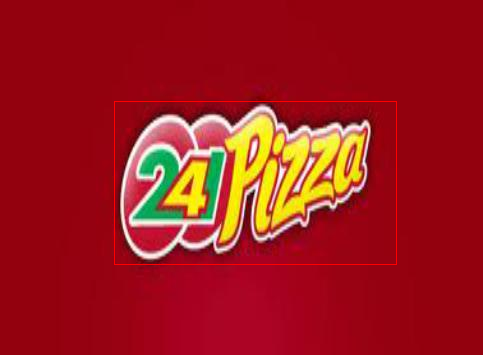

In [10]:
from PIL import Image, ImageDraw, ImageFont
image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)

for score, label, box in zip(result["scores"], result["labels"], result["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    text_label = model.config.id2label[label.item()]

image_with_boxes